In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.metrics import r2_score

In [6]:
df=pd.read_csv("1000_Companies.csv")

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.shape

(1000, 5)

In [9]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
R&D Spend          1000 non-null float64
Administration     1000 non-null float64
Marketing Spend    1000 non-null float64
State              1000 non-null object
Profit             1000 non-null float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [11]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
s=df['R&D Spend']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [13]:
len(outliers)

0

In [14]:
s=df['Administration']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [15]:
len(outliers1)

22

In [16]:
a=list(outliers1.keys())
df.drop(a,inplace=True)

In [17]:
s=df['Marketing Spend']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers2=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [18]:
len(outliers2)

0

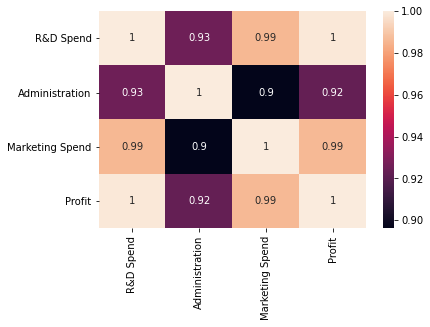

In [19]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [20]:
le=LabelEncoder()

In [21]:
df['State']=le.fit_transform(df['State'])

In [22]:
X=df.drop('Profit',axis=1)
Y=df['Profit']

In [23]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0


In [24]:
Y.head()

0    192261.83
2    191050.39
3    182901.99
5    156991.12
6    156122.51
Name: Profit, dtype: float64

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
ss=StandardScaler()

In [27]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [28]:
def create_model(model):
    model.fit(X_train_ss,Y_train)
    Y_pred=model.predict(X_test_ss)
    print(r2_score(Y_test,Y_pred))

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr=LinearRegression()
create_model(lr)

0.9990385891420716


In [31]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
create_model(dt)

0.9982899479833139


In [32]:
from sklearn.svm import LinearSVR 
svr=LinearSVR(random_state=1)
create_model(svr)

-8.6070442307467


In [33]:
from sklearn.svm import SVR 
POLY_SVR=SVR(kernel="poly")
RADIAL_SVR=SVR(kernel="rbf")

In [34]:
create_model(POLY_SVR)

0.031425533430155195


In [35]:
create_model(RADIAL_SVR)

0.0048259941348196556


In [36]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
create_model(ada)

0.9931760956785084


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor()
create_model(gbc)

0.9986808676828031


In [38]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
create_model(xgb)

0.9981447409806417


In [39]:
from sklearn.ensemble import BaggingRegressor
bc=BaggingRegressor(LinearRegression(),random_state=1) 
bc1=BaggingRegressor(LinearRegression(),random_state=1,bootstrap=False)

In [40]:
create_model(bc)

0.999112769824076


In [41]:
create_model(bc1)

0.9990385891420716


In [42]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
create_model(rfc)

0.998939965643849
